In [1]:
# Import libraries
import numpy as np # type: ignore
import pandas as pd # type: ignore
import os
import glob
import random
import cv2
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure, color
from skimage.transform import resize
from skimage import feature

In [2]:
class DatasetReader:
    def __init__(self, base_dir):
        self.base_dir = base_dir

    def read_dataset(self):
        image_paths = []
        labels = []

        main_folders = sorted(os.listdir(self.base_dir))
        for main_folder in main_folders:
            main_folder_path = os.path.join(self.base_dir, main_folder)
            # Get all gesture folders
            gesture_folders = sorted(os.listdir(main_folder_path))
            for gesture_folder in gesture_folders:
                gesture_folder_path = os.path.join(main_folder_path, gesture_folder)
                # Get all images in the gesture folder
                for img_path in glob.glob(f'{gesture_folder_path}/*.png'):
                    image_paths.append(img_path)
                    labels.append(gesture_folder)
        return image_paths, labels
    
    def info(self):
        image_paths, labels = self.read_dataset()
        print(f'Total number of images: {len(image_paths)}')
        print(f'Total number of labels: {len(set(labels))}')
    
    def show_random_images(self, num_images=5):
        image_paths, labels = self.read_dataset()
        random_image_paths = random.sample(image_paths, num_images)
        fig, axs = plt.subplots(1, num_images, figsize=(20, 20))
        for i, img_path in enumerate(random_image_paths):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB for matplotlib
            axs[i].imshow(img)
            axs[i].set_title(labels[image_paths.index(img_path)])  # Set title based on label
            axs[i].axis('off')
        plt.tight_layout()
        plt.show()
    
    def random_image(self):
        image_paths, labels = self.read_dataset()
        random_image_path = random.choice(image_paths)
        return random_image_path
    
    

class DataProcessor:
    def __init__(self):
        pass
    
    def detect_and_crop_hand(self, image):
        # Ensure the image is grayscale
        if len(image.shape) > 2:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Example: Using simple thresholding to detect hand region (replace with your detection method)
        _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Find contours of the thresholded image
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Assume the largest contour is the hand
        max_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(max_contour)

        # Ensure the bounding box is square
        size = max(w, h)
        x_center = x + w // 2
        y_center = y + h // 2
        half_size = size // 2

        # Calculate the region of interest (ROI) coordinates
        roi_top_left_x = max(0, x_center - half_size)
        roi_top_left_y = max(0, y_center - half_size)
        roi_bottom_right_x = min(image.shape[1], x_center + half_size)
        roi_bottom_right_y = min(image.shape[0], y_center + half_size)

        # Crop the ROI from the image
        cropped_hand = image[roi_top_left_y:roi_bottom_right_y, roi_top_left_x:roi_bottom_right_x]

        # Resize the cropped hand image to a square size (e.g., 100x100)
        resized_hand = cv2.resize(cropped_hand, (240, 240))

        return resized_hand


class GestureRecognizer:
    pass

class VideoGestureDetector:
    pass

class CameraGestureDetector:
    pass



Total number of images: 20000
Total number of labels: 10


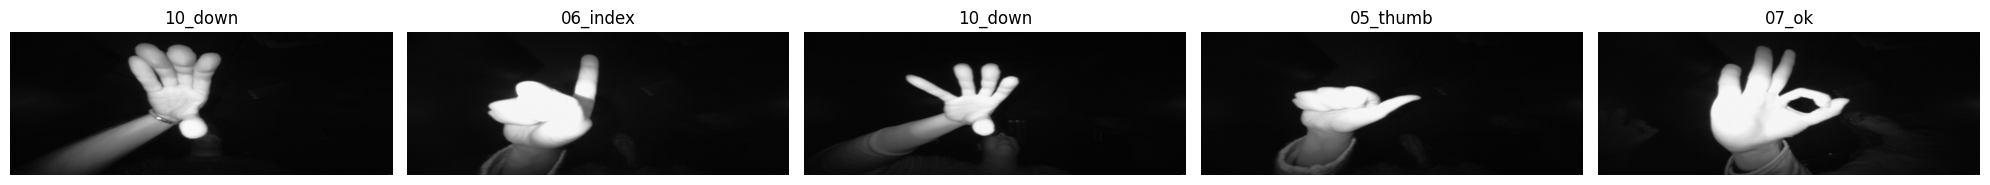

D:/S4_SU24/CPV301/Asm/imagedata\08\02_l\frame_08_02_0076.png


In [3]:
# Khởi tạo class GestureDatasetReader
dataset_reader = DatasetReader(base_dir='D:/S4_SU24/CPV301/Asm/imagedata')

# Đọc dữ liệu từ cấu trúc thư mục
image_paths, labels = dataset_reader.read_dataset()

# Hiển thị thông tin dữ liệu
dataset_reader.info()

# Hiển thị một số hình ảnh ngẫu nhiên
dataset_reader.show_random_images(num_images=5)

print(dataset_reader.random_image())




In [4]:
data_processor = DataProcessor()
# Example usage
image_path = dataset_reader.random_image()
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if gray_image is None:
    print(f"Could not read the image from path: {image_path}")
else:
    # Ensure the image is resized to 640x240
    resized_image = cv2.resize(gray_image, (640, 240))

    # Detect and crop hand region
    cropped_hand = data_processor.detect_and_crop_hand(resized_image)

    # Display the cropped hand image
    cv2.imshow('Cropped Hand', cropped_hand)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
